In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv, sys, time, os, re
import scipy.optimize
from math import *

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def do_plot (Res):
    plt.errorbar(Res['T_mean'], Res['D'], xerr=Res['T_err'], yerr=Res['D_err'], linestyle=' ')
    plt.scatter([0],[0])
    for i in range(len(Res)):
        r = Res.iloc[i]
        plt.annotate(r['name'], (r['T_mean']+5,r['D']-1.2*r['D_err']), size=8, ha='center', va='top')

In [3]:
def load_folder (folders):
    Res = pd.DataFrame()
    for path in folders:
        df = pd.read_csv(path+"/diffus.csv", sep=',', header=None)
        df = df.set_index(0).T
        for col in ['T_mean','T_err','D','D_err']:
            df[col] = df[col].astype(float)
        df['N_traj'] = df['N_traj'].astype(int)
        d = dict(df)
        df2 = pd.read_csv(path+"/params.csv", sep=',', header=None)
        d.update(dict(df2.set_index(0).T))
        Res = Res.append(pd.DataFrame(d), ignore_index=True, sort=False)
    return Res

In [4]:
Res2 = pd.DataFrame({
    'name'  : [  "1",   "2",   "3",   "4",   "5",   "6",   "7",   "8",   "9",  "10",  "11"],
    'T_mean': [178.6, 150.0, 134.9, 219.9, 199.9, 209.9, 275.2, 114.9, 350.7, 300.0, 380.3],
    'T_err' : [  3.5,   3.2,   2.7,   4.3,   3.9,   4.1,   5.3,   2.3,   6.7,   5.7,   7.2],
    'D'     : [0.332, 0.321, 0.316, 0.370, 0.367, 0.379, 0.434, 0.255, 0.527, 0.456, 0.518],
    'D_err' : [0.038, 0.044, 0.030, 0.034, 0.036, 0.040, 0.039, 0.028, 0.041, 0.041, 0.047]
})
Res2

,name,T_mean,T_err,D,D_err
0,1,178.6,3.5,0.332,0.038
1,2,150.0,3.2,0.321,0.044
2,3,134.9,2.7,0.316,0.030
3,4,219.9,4.3,0.370,0.034
4,5,199.9,3.9,0.367,0.036
5,6,209.9,4.1,0.379,0.040
6,7,275.2,5.3,0.434,0.039
7,8,114.9,2.3,0.255,0.028
8,9,350.7,6.7,0.527,0.041
9,10,300.0,5.7,0.456,0.041


In [5]:
Res3 = load_folder(["res50"])
Res3

FileNotFoundError: [Errno 2] File res50/diffus.csv does not exist: 'res50/diffus.csv'

In [6]:
Res2_bis = load_folder(["res3","res4"])
Res2_bis

FileNotFoundError: [Errno 2] File res3/diffus.csv does not exist: 'res3/diffus.csv'

In [8]:
Res = load_folder(["remi1","res1","res2","remi5","remi6","remi7","remi8","remi9","remi10"])
Res

,N_traj,T_mean,T_err,D,D_err,name,N_gas,Delta_t,d0,E0,cont_r,part_d,part_E0,part_m,target_T,t_beg,t_end,delta_t_beg_cutoff
0,488,250.225714,3.795108,0.454281,0.032792,remi1,800.0,0.000002,0.03,2.0,0.6762,0.06,2.0,10.0,250.0,0.170,0.30,0.035
1,322,300.322108,4.508790,0.474115,0.040600,res1,800.0,0.000002,0.03,2.0,0.6762,0.06,2.0,10.0,300.0,0.200,0.32,NaN
2,389,200.214451,3.069936,0.415164,0.033590,res2,800.0,0.000002,0.03,2.0,0.6762,0.06,2.0,10.0,200.0,0.200,0.38,NaN
3,466,400.405077,5.918038,0.565455,0.040934,remi5,800.0,0.000002,0.03,2.0,0.6762,0.06,2.0,10.0,400.0,0.220,0.31,0.035
4,416,200.171229,3.076707,0.401610,0.032078,remi6,800.0,0.000002,0.03,2.0,0.6762,0.06,2.0,10.0,200.0,0.150,0.33,0.035
5,554,300.236837,4.506122,0.464913,0.031928,remi7,800.0,0.000002,0.03,2.0,0.6762,0.06,2.0,10.0,300.0,0.170,0.29,0.035
6,620,350.327112,5.216351,0.516051,0.032753,remi8,800.0,0.000002,0.03,2.0,0.6762,0.06,2.0,10.0,350.0,0.185,0.30,0.035
7,399,160.310232,2.491096,0.363229,0.028534,remi9,800.0,0.000002,0.03,2.0,0.6762,0.06,2.0,10.0,160.0,0.110,0.28,0.035
8,481,120.163564,1.896949,0.320371,0.023425,remi10,800.0,0.000002,0.03,2.0,0.6762,0.06,2.0,10.0,120.0,0.140,0.37,0.035


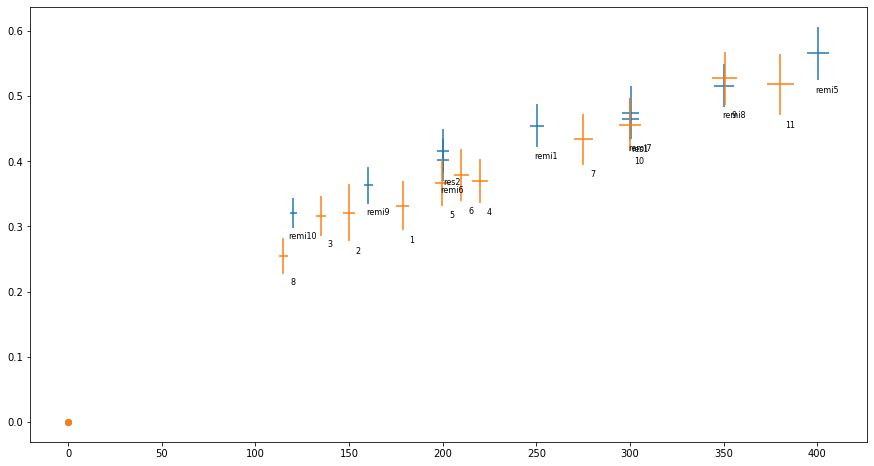

In [10]:
plt.figure(figsize=(15,8))
do_plot(Res)
do_plot(Res2)
#do_plot(Res2_bis)
#do_plot(Res3)

In [16]:
def do_plot_gamma (Res):
    gamma = Res['T_mean']/Res['D']
    gamma_err = gamma * ( Res['D_err']/Res['D'] + Res['T_err']/Res['T_mean'] )
    plt.errorbar(Res['T_mean'], gamma, xerr=Res['T_err'], yerr=gamma_err, linestyle=' ')

(0.0, 800.0)

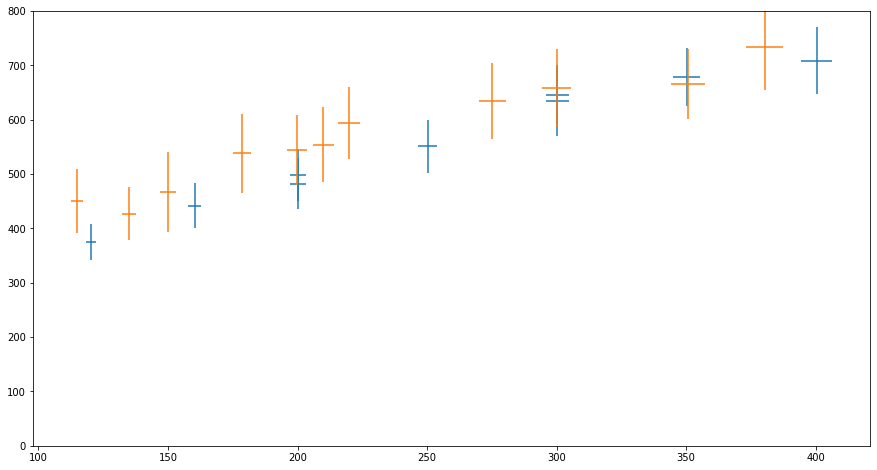

In [20]:
plt.figure(figsize=(15,8))
do_plot_gamma(Res)
do_plot_gamma(Res2)
plt.ylim((0,800))